# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"
online_rt = pd.read_csv(url, encoding = 'latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

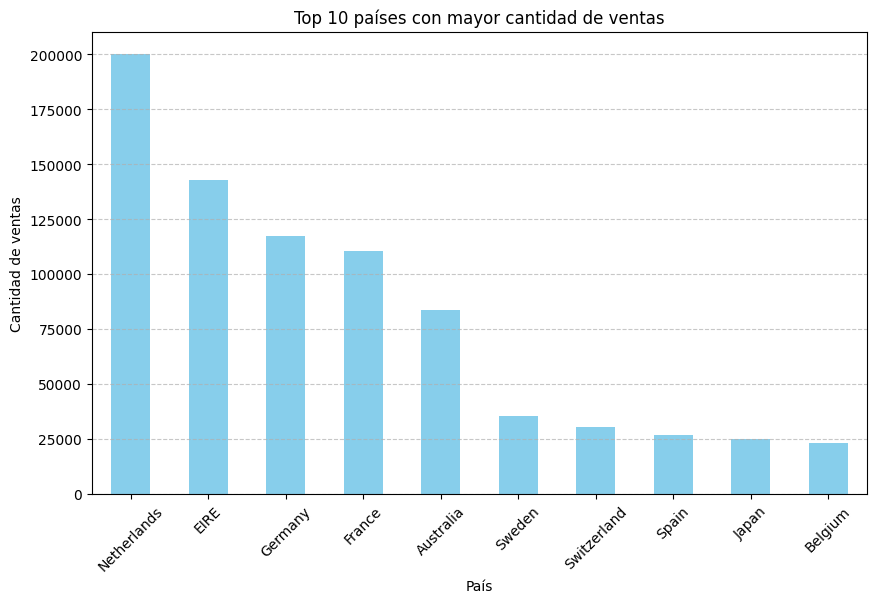

In [8]:
#Filtrar los datos para excluir a UK
online_rt_filtered= online_rt[online_rt["Country"] != "United Kingdom"]

#Agrupar por país y sumar cantidad de venta 
country_sales = online_rt_filtered.groupby ("Country")["Quantity"].sum()

#Seleccionar los 10 países con mayor cantidad de ventas
top_10_countries_sales = country_sales.nlargest(10)

#Crear el gráfico de barras (histograma)
plt.figure(figsize=(10,6)) #Tamaño de la figura
top_10_countries_sales.plot(kind="bar", color="skyblue") #Tipo de gráfico y color
plt.title("Top 10 países con mayor cantidad de ventas") #Título del gráfico
plt.xlabel("País") #Nombre del eje x
plt.ylabel("Cantidad de ventas") #Nombre del eje y
plt.xticks(rotation=45) #Rotar los nombres de los países
plt.grid(axis="y", linestyle="--", alpha=0.7) #Agregar una grilla en el eje y
plt.show() #Mostrar el gráfico



### Step 5.  Exclude negative Quantity entries

In [10]:
#Excluir las entradas con cantidades negativas

online_rt_filtered = online_rt_filtered[online_rt_filtered["Quantity"] > 0]

#Comprobar

print(online_rt_filtered["Quantity"].min())

1


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

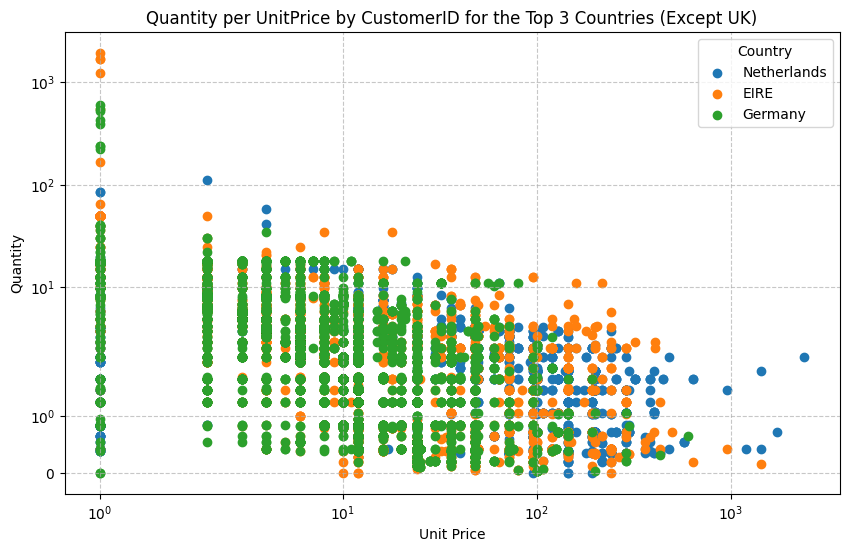

In [31]:
#Agrupar por país y sumar cantidad de venta 
country_sales = online_rt_filtered.groupby ("Country")["Quantity"].sum()

#Seleccionar los 3 países con mayor cantidad de ventas (solo los nombres de los países)
top_3_countries = country_sales.nlargest(3).index

#Filtrar los datos para incluir solo los 3 países seleccionados
top_3_countries_info = online_rt_filtered[online_rt_filtered["Country"].isin(top_3_countries)]

#Crear el gráfico de dispersión

plt.figure(figsize=(10,6)) #Tamaño de la figura

#Iterar sobre los países seleccionados, y crear un gráfico de dispersión para cada uno

for country in top_3_countries:
    country_info = top_3_countries_info[top_3_countries_info["Country"] == country]
    plt.scatter(country_info["Quantity"], country_info["UnitPrice"], label=country)

plt.title('Quantity per UnitPrice by CustomerID for the Top 3 Countries (Except UK)')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')


# Aplicar escala logarítmica inversa a los ejes
plt.xscale('symlog')
plt.yscale('symlog')

plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()





### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [33]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum()

customers.head()

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice
CustomerID,Country,,,,,,
12346.0,United Kingdom,541431C541433,2316623166,MEDIUM CERAMIC TOP STORAGE JARMEDIUM CERAMIC T...,0,1/18/11 10:011/18/11 10:17,2.08
12347.0,Iceland,5376265376265376265376265376265376265376265376...,8511622375714772249222771227722277322774227752...,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,2458,12/7/10 14:5712/7/10 14:5712/7/10 14:5712/7/10...,481.21
12348.0,Finland,5393185393185393185393185393185393185393185393...,8499222951849918499121213212132261621981219822...,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2341,12/16/10 19:0912/16/10 19:0912/16/10 19:0912/1...,178.71
12349.0,Italy,5776095776095776095776095776095776095776095776...,2311223460215642141121563221312219548194849782...,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,631,11/21/11 9:5111/21/11 9:5111/21/11 9:5111/21/1...,605.10
12350.0,Norway,5430375430375430375430375430375430375430375430...,219082241279066K79191C2234884086C2255122557218...,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,197,2/2/11 16:012/2/11 16:012/2/11 16:012/2/11 16:...,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [34]:
print(customers['UnitPrice'].dtype)

#La reflexión reside en que hay que tener cuidado al sumar columnas para realizar estudios sobre el comportamiento del consumidor

#ya que en este caso se interpreta igual pedir 100 cosas de un euro que una cosa de 100 euros

float64


##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [36]:
# Filtrar los datos para los CustomerID 12346.0 y 12347.0
filtered_customers = online_rt[online_rt['CustomerID'].isin([12346.0, 12347.0])]

# Mostrar las filas filtradas
filtered_customers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [38]:
#Agrupar por país y sumar cantidad de venta 
country_sales = online_rt_filtered.groupby ("Country")["Quantity"].sum()

#Seleccionar los 3 países con mayor cantidad de ventas (solo los nombres de los países)
top_3_countries = country_sales.nlargest(3).index
top_3_countries

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [39]:

# Agregar una columna a online_rt llamada 'Revenue' para calcular los ingresos (Quantity * UnitPrice) de cada venta
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

# Mostrar las primeras filas del DataFrame resultante
print(online_rt.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0  12/1/10 8:26       2.55     17850.0  United Kingdom    15.30  
1  12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  
2  12/1/10 8:26       2.75     17850.0  United Kingdom    22.00  
3  12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  
4  12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [40]:
# Agrupar los datos por 'CustomerID' y 'Country' y calcular el precio promedio por unidad
avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')

# Mostrar las primeras filas del DataFrame resultante
print(avg_price_per_customer.head())

C:\Users\javie\AppData\Local\Temp\ipykernel_6616\3965039283.py:2: RuntimeWarning: invalid value encountered in scalar divide
  avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')
C:\Users\javie\AppData\Local\Temp\ipykernel_6616\3965039283.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')


   CustomerID         Country  AvgPrice
0     12346.0  United Kingdom       NaN
1     12347.0         Iceland  1.753458
2     12348.0         Finland  0.767723
3     12349.0           Italy  2.785341
4     12350.0          Norway  1.697462


C:\Users\javie\AppData\Local\Temp\ipykernel_6616\3965039283.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')


##### Step 7.3.3 Plot

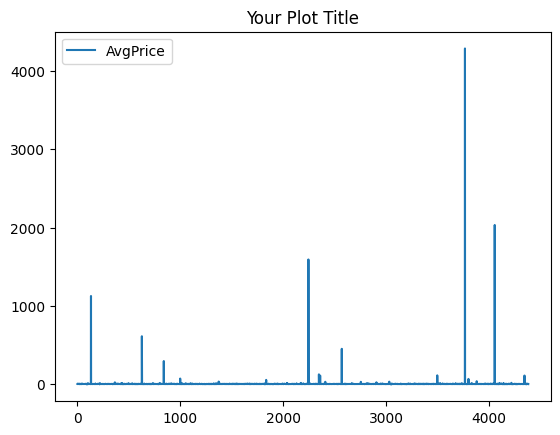

In [46]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want to plot it
avg_price_per_customer.plot(kind='line', y='AvgPrice')  # Adjust 'Date' and 'Value' to your actual column names

plt.title('Your Plot Title')

plt.show()

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

C:\Users\javie\AppData\Local\Temp\ipykernel_6616\646068970.py:11: RuntimeWarning: invalid value encountered in scalar divide
  avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')
C:\Users\javie\AppData\Local\Temp\ipykernel_6616\646068970.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')
C:\Users\javie\AppData\Local\Temp\ipykernel_6616\646068970.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price_per_custom

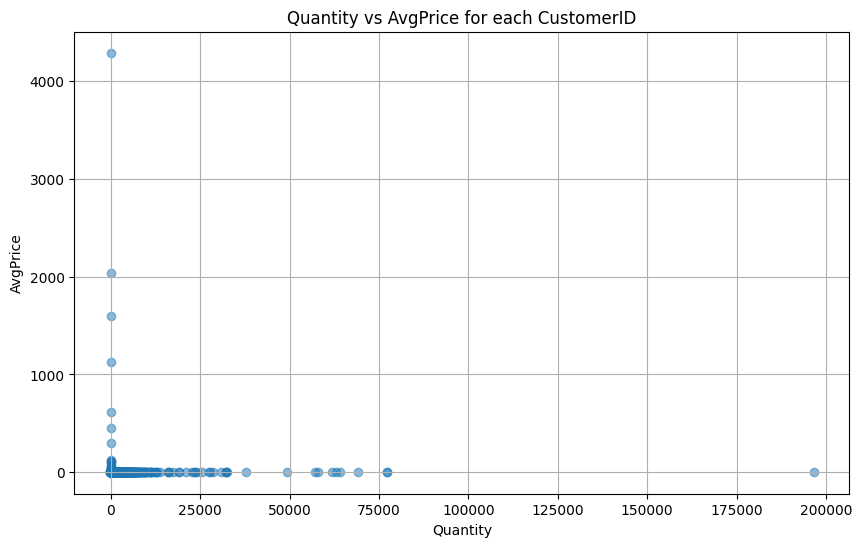

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que ya has cargado tu DataFrame en la variable online_rt
# online_rt = pd.read_csv('tu_archivo.csv')

# Agregar una columna a online_rt llamada 'Revenue' para calcular los ingresos (Quantity * UnitPrice) de cada venta
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

# Agrupar los datos por 'CustomerID' y 'Country' y calcular el precio promedio por unidad
avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')

# Agregar la cantidad total por cliente
total_quantity_per_customer = online_rt.groupby(['CustomerID', 'Country'])['Quantity'].sum().reset_index(name='TotalQuantity')

# Unir los DataFrames para obtener un DataFrame plottable
plottable = pd.merge(avg_price_per_customer, total_quantity_per_customer, on=['CustomerID', 'Country'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(plottable['TotalQuantity'], plottable['AvgPrice'], alpha=0.5)
plt.title('Quantity vs AvgPrice for each CustomerID')
plt.xlabel('Quantity')
plt.ylabel('AvgPrice')
plt.grid(True)
plt.show()

##### Step 7.4.2 Zoom in so we can see that curve more clearly

C:\Users\javie\AppData\Local\Temp\ipykernel_6616\2590021674.py:11: RuntimeWarning: invalid value encountered in scalar divide
  avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')
C:\Users\javie\AppData\Local\Temp\ipykernel_6616\2590021674.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')
C:\Users\javie\AppData\Local\Temp\ipykernel_6616\2590021674.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price_per_cus

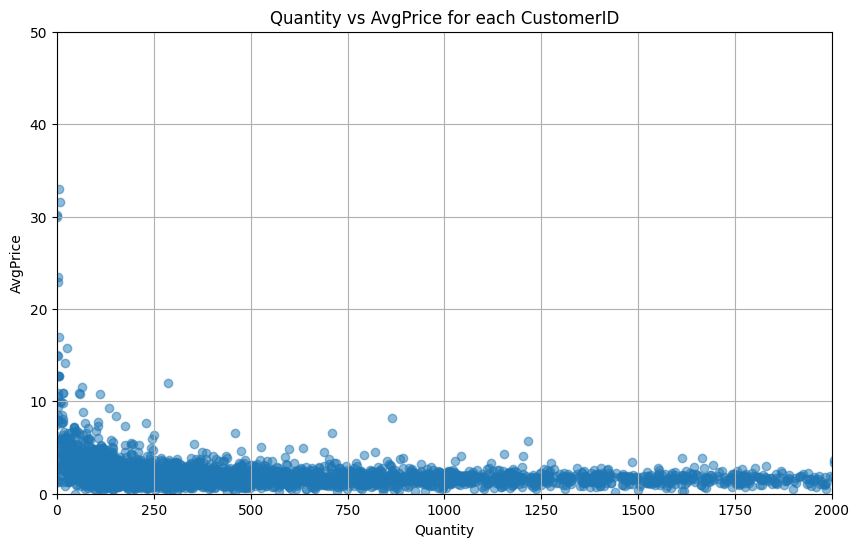

In [52]:


# Agregar una columna a online_rt llamada 'Revenue' para calcular los ingresos (Quantity * UnitPrice) de cada venta
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

# Agrupar los datos por 'CustomerID' y 'Country' y calcular el precio promedio por unidad
avg_price_per_customer = online_rt.groupby(['CustomerID', 'Country']).apply(lambda x: (x['Revenue'].sum() / x['Quantity'].sum())).reset_index(name='AvgPrice')

# Agregar la cantidad total por cliente
total_quantity_per_customer = online_rt.groupby(['CustomerID', 'Country'])['Quantity'].sum().reset_index(name='TotalQuantity')

# Unir los DataFrames para obtener un DataFrame plottable
plottable = pd.merge(avg_price_per_customer, total_quantity_per_customer, on=['CustomerID', 'Country'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(plottable['TotalQuantity'], plottable['AvgPrice'], alpha=0.5)
plt.title('Quantity vs AvgPrice for each CustomerID')
plt.xlabel('Quantity')
plt.ylabel('AvgPrice')

# Ajustar los límites de los ejes para acercar la visualización
plt.xlim(0, 2000)  # Ajusta estos valores según sea necesario
plt.ylim(0, 50)    # Ajusta estos valores según sea necesario

plt.grid(True)
plt.show()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

C:\Users\javie\AppData\Local\Temp\ipykernel_6616\3352742432.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = online_rt.groupby('PriceInterval').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()


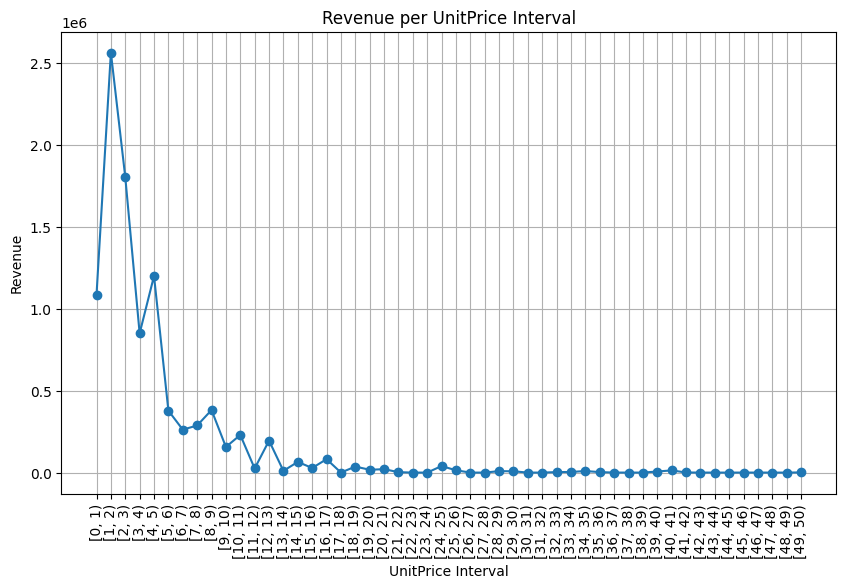

In [53]:


# Agregar una columna a online_rt llamada 'Revenue' para calcular los ingresos (Quantity * UnitPrice) de cada venta
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

# Crear una nueva columna para los intervalos de precios
online_rt['PriceInterval'] = pd.cut(online_rt['UnitPrice'], bins=range(0, 51, 1), right=False)

# Agrupar los datos por los intervalos de precios y sumar Quantity y Revenue
grouped = online_rt.groupby('PriceInterval').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(grouped['PriceInterval'].astype(str), grouped['Revenue'], marker='o')
plt.title('Revenue per UnitPrice Interval')
plt.xlabel('UnitPrice Interval')
plt.ylabel('Revenue')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)
plt.show()

#### 8.3 Plot.

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

C:\Users\javie\AppData\Local\Temp\ipykernel_6616\1231946301.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = online_rt.groupby('PriceInterval').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()


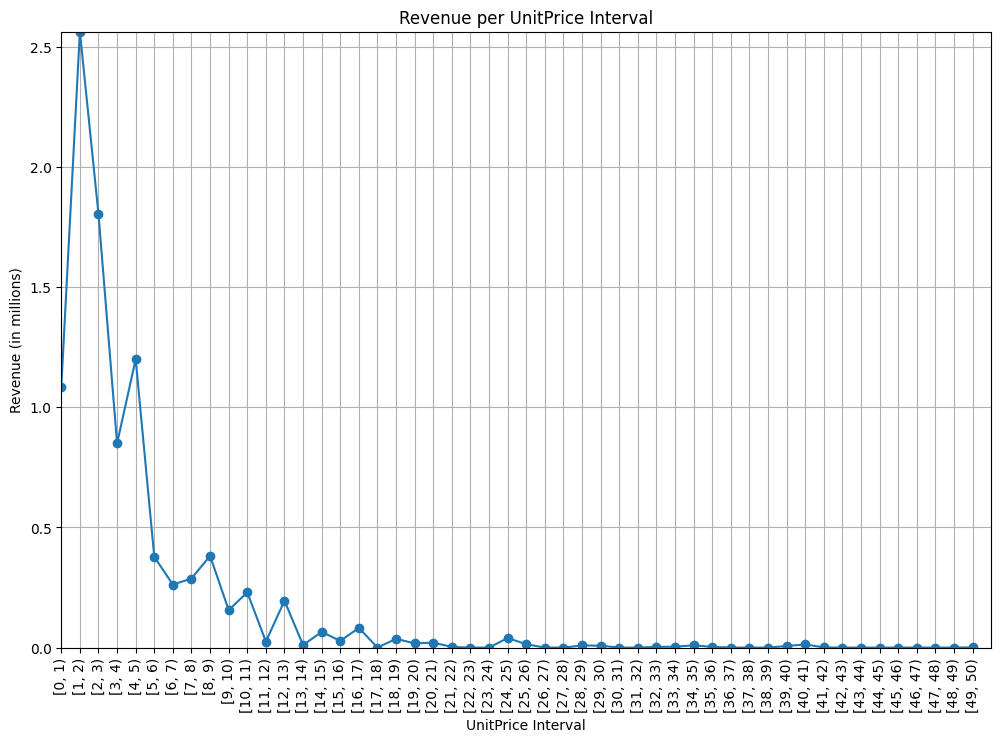

In [55]:


# Agregar una columna a online_rt llamada 'Revenue' para calcular los ingresos (Quantity * UnitPrice) de cada venta
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

# Crear una nueva columna para los intervalos de precios
online_rt['PriceInterval'] = pd.cut(online_rt['UnitPrice'], bins=range(0, 51, 1), right=False)

# Agrupar los datos por los intervalos de precios y sumar Quantity y Revenue
grouped = online_rt.groupby('PriceInterval').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

# Graficar los resultados
plt.figure(figsize=(12, 8))
plt.plot(grouped['PriceInterval'].astype(str), grouped['Revenue'] / 1e6, marker='o')
plt.title('Revenue per UnitPrice Interval')
plt.xlabel('UnitPrice Interval')
plt.ylabel('Revenue (in millions)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)

# Ajustar los límites de los ejes para acercar la visualización
plt.xlim(0, 50)  # Ajusta estos valores según sea necesario
plt.ylim(0, grouped['Revenue'].max() / 1e6)  # Ajusta estos valores según sea necesario

plt.show()

### BONUS: Create your own question and answer it.